## Data Importing
Import the data and conduct the most basic investigation.

In [24]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.data as pld
import plotly.graph_objects as go

vehicle = pd.read_csv('vehicles_A1.csv')
vehicle.head()
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46565 entries, 0 to 46564
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   barrels08       46565 non-null  float64
 1   city08          46565 non-null  int64  
 2   co2TailpipeGpm  46565 non-null  float64
 3   comb08          46565 non-null  int64  
 4   cylinders       45961 non-null  float64
 5   displ           45963 non-null  float64
 6   drive           45379 non-null  object 
 7   engId           46565 non-null  int64  
 8   eng_dscr        29361 non-null  object 
 9   fuelCost08      46565 non-null  int64  
 10  fuelType        46565 non-null  object 
 11  highway08       46565 non-null  int64  
 12  hlv             46565 non-null  int64  
 13  hpv             46565 non-null  int64  
 14  id              46565 non-null  int64  
 15  make            46565 non-null  object 
 16  model           46565 non-null  object 
 17  trany           46554 non-null 

## Data Profiling

1. Missing Data: Since missing values can lead to misleading analysis. For example, our given dataset, the "eng_dscr" column has some missing values, which could impact the accuracy of any analysis based on engine descriptions. Since "dropna()" will omit too many entries (to 28,201 entries), so here "fillna()" is being practiced.

2. Inconsistencies: Data might have inconsistencies such as different units of measurement, typographical errors, or duplicate records. For this dataset, I onnly address on the duplicates entries.

In [25]:
# Dealing with missing data
# For numerical columns (int64 and float64 data types)
numerical_cols = vehicle.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    vehicle[col] = vehicle[col].fillna(vehicle[col].mean())

# For object columns (object data types) :
object_cols = vehicle.select_dtypes(include=['object']).columns
for col in object_cols:
    vehicle[col] = vehicle[col].fillna(vehicle[col].mode()[0])

# Drop duplicate entries
vehicle = vehicle.drop_duplicates()
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46565 entries, 0 to 46564
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   barrels08       46565 non-null  float64
 1   city08          46565 non-null  int64  
 2   co2TailpipeGpm  46565 non-null  float64
 3   comb08          46565 non-null  int64  
 4   cylinders       46565 non-null  float64
 5   displ           46565 non-null  float64
 6   drive           46565 non-null  object 
 7   engId           46565 non-null  int64  
 8   eng_dscr        46565 non-null  object 
 9   fuelCost08      46565 non-null  int64  
 10  fuelType        46565 non-null  object 
 11  highway08       46565 non-null  int64  
 12  hlv             46565 non-null  int64  
 13  hpv             46565 non-null  int64  
 14  id              46565 non-null  int64  
 15  make            46565 non-null  object 
 16  model           46565 non-null  object 
 17  trany           46565 non-null 

## Data Analysis

Correlation Analysis

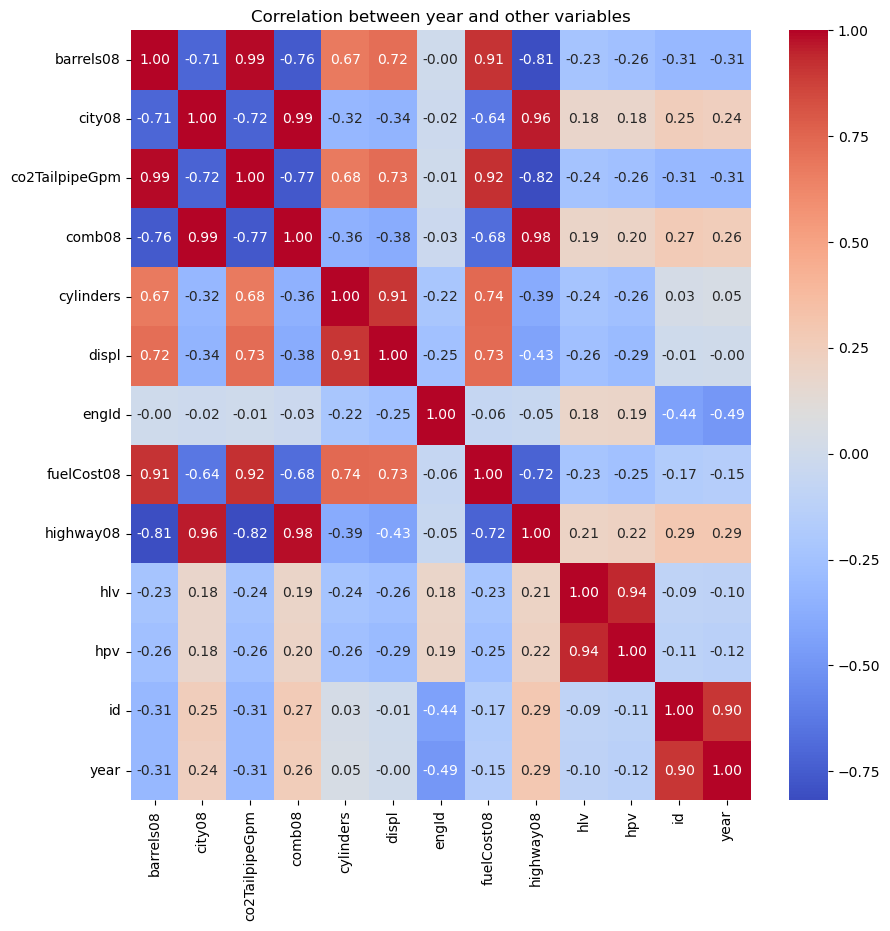

In [26]:
# Calculate Correlation Matrix
correlation_matrix = vehicle.corr()

# Visualizing 'year' correlation using Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between year and other variables')
plt.show()

### Visualisation 1

In [27]:
# Filter vehicles based on special conditions
electric_vehicles = vehicle[vehicle['fuelType'].str.contains('electricity', case=False)]
plugin_vehicles = vehicle[vehicle['model'].str.contains('plug-in', case=False)]
both_vehicles = vehicle[vehicle['fuelType'].str.contains('electricity', case=False) &
                        vehicle['model'].str.contains('plug-in', case=False)]

# Find the top 10 VClass by count
top_VClass_by_count = vehicle['VClass'].value_counts().head(10).index.tolist()

# Filter the dataframes
vehicle = vehicle[vehicle['VClass'].isin(top_VClass_by_count)]
electric_vehicles = electric_vehicles[electric_vehicles['VClass'].isin(top_VClass_by_count)]
plugin_vehicles = plugin_vehicles[plugin_vehicles['VClass'].isin(top_VClass_by_count)]
both_vehicles = both_vehicles[both_vehicles['VClass'].isin(top_VClass_by_count)]

#Plot the boxplot
fig = px.box(vehicle, x='VClass', y='co2TailpipeGpm',
             title='Tailpipe CO2 by Vehicle Class',
             labels={'VClass': 'Vehicle Class', 'co2TailpipeGpm': 'tailpipe CO2 in grams/mile'})
fig.update_layout(title_x=0.5)

# Add scatter plots for special conditions
fig.add_trace(go.Scatter(x=electric_vehicles['VClass'], y=electric_vehicles['co2TailpipeGpm'],
                         mode='markers', marker_color='red',
                         name='Electric Vehicles'))

fig.add_trace(go.Scatter(x=plugin_vehicles['VClass'], y=plugin_vehicles['co2TailpipeGpm'],
                         mode='markers', marker_color='blue',
                         name='Plug-in Vehicles'))

fig.add_trace(go.Scatter(x=both_vehicles['VClass'], y=both_vehicles['co2TailpipeGpm'],
                         mode='markers', marker_color='purple',
                         name='Electric & Plug-in Vehicles'))

fig.update_layout(showlegend=True)
fig.show()

### Visualisation 2

In [28]:
# Find the top 10 makers by count
top_makers_by_count = vehicle['make'].value_counts().head(10)
makers_ordered_by_count = top_makers_by_count.index.tolist()

# Filter the DataFrame to include only the top 10 makers by count and year >= 1995 and create a distinct copy
filtered_vehicle = vehicle[(vehicle['make'].isin(makers_ordered_by_count)) & (vehicle['year'] >= 1995)].copy()

# Formulate the information for each point using the .loc accessor
filtered_vehicle.loc[:, 'info'] = 'Make: ' + filtered_vehicle['make'] + '<br>' + \
                                 'Model: ' + filtered_vehicle['model'] + '<br>' + \
                                 'Trany: ' + filtered_vehicle['trany'] + '<br>' + \
                                 'VClass: ' + filtered_vehicle['VClass'] + '<br>' + \
                                 'Year: ' + filtered_vehicle['year'].astype(str) + '<br>' + \
                                 'co2TailpipeGpm: ' + filtered_vehicle['co2TailpipeGpm'].round(7).astype(str) + ' (grams/mile)'

color_discrete_sequence = px.colors.qualitative.Plotly

# Create a function to generate the box plot for the given y-axis column
def generate_box_plot(y_column):
    fig = px.box(filtered_vehicle,
                 x='make',
                 y=y_column,
                 color='make',
                 color_discrete_sequence=color_discrete_sequence,
                 category_orders={'make': makers_ordered_by_count},
                 title=f'Box plot of {y_column} by Top 10 Makers by Count',
                 labels={y_column: y_column, 'make': 'Makers'},
                 custom_data=['info'])

    fig.update_traces(
        hovertemplate="<br>".join([
                   "Make: %{x}",
                   "Combined MPG (comb08): %{y}",
                   "%{customdata}",
        ])
    )

    fig.update_layout(showlegend=False)

    return fig

# Generate the two figures
fig_comb08 = generate_box_plot('comb08')
fig_co2TailpipeGpm = generate_box_plot('co2TailpipeGpm')

# Add the dropdown menu
fig_comb08.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=list([
              dict(label="Combined MPG (comb08)",
                  method="update",
                  args=[{"y": [fig_comb08.data[i].y for i in range(len(fig_comb08.data))],
                          "hovertemplate": fig_comb08.data[0].hovertemplate},
                        {"title": "Box plot of Combined MPG (comb08) by Top 10 Makers by Count",
                          "yaxis": {"title": "Combined MPG (comb08)"}}]),
              dict(label="co2TailpipeGpm (grams/mile)",
                  method="update",
                  args=[{"y": [fig_co2TailpipeGpm.data[i].y for i in range(len(fig_co2TailpipeGpm.data))],
                          "hovertemplate": fig_co2TailpipeGpm.data[0].hovertemplate},
                        {"title": "Box plot of co2TailpipeGpm by Top 10 Makers by Count",
                          "yaxis": {"title": "co2TailpipeGpm (grams/mile)"}}])
          ]),
        )
    ]
)

fig_comb08.show()


### Visualisation 3
Extract the outliners of the second visualisation, and discuss it in details.

In [29]:
# Calculate IQR for 'comb08'
Q1_comb08 = vehicle['comb08'].quantile(0.25)
Q3_comb08 = vehicle['comb08'].quantile(0.75)
IQR_comb08 = Q3_comb08 - Q1_comb08
lower_bound_comb08 = Q1_comb08 - 1.5 * IQR_comb08
upper_bound_comb08 = Q3_comb08 + 1.5 * IQR_comb08

# Calculate IQR for 'co2TailpipeGpm'
Q1_co2 = vehicle['co2TailpipeGpm'].quantile(0.25)
Q3_co2 = vehicle['co2TailpipeGpm'].quantile(0.75)
IQR_co2 = Q3_co2 - Q1_co2
lower_bound_co2 = Q1_co2 - 1.5 * IQR_co2
upper_bound_co2 = Q3_co2 + 1.5 * IQR_co2

# Extract rows where either 'comb08(> upper bound)' or 'co2TailpipeGpm(< lower bound)' are outliers
outliers = vehicle[(vehicle['comb08'] > upper_bound_comb08) | (vehicle['co2TailpipeGpm'] < lower_bound_co2)]

print(outliers.head())

num_outliers = len(outliers)
print(f"Number of entries that are outliers: {num_outliers}")

     barrels08  city08  co2TailpipeGpm  comb08  cylinders  displ  \
776   7.256341      38      216.756098      41        3.0    1.0   
823   7.437750      38      222.175000      40        3.0    1.0   
825   6.330000      43      189.085106      47        3.0    1.0   
827   7.829211      35      233.868421      38        4.0    1.5   
828   8.264167      33      246.861111      36        4.0    1.5   

                 drive  engId          eng_dscr  fuelCost08 fuelType  \
776  Front-Wheel Drive  54003             (FFS)        1300  Regular   
823  Front-Wheel Drive  54002             (FFS)        1350  Regular   
825  Front-Wheel Drive  54001             (FFS)        1150  Regular   
827  Front-Wheel Drive  26005  (8-VALVE)  (FFS)        1400  Regular   
828  Front-Wheel Drive  26005  (8-VALVE)  (FFS)        1500  Regular   

     highway08  hlv  hpv     id       make      model         trany  \
776         45    0    0  10697  Chevrolet     Sprint  Manual 5-spd   
823         44  

In [30]:
!pip install dash
!pip install dash-bootstrap-components

import dash
from dash import html
from dash.dependencies import Input, Output
import dash_core_components as dcc
from dash import dcc
import plotly.express as pxz

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(
    [
        # This dbc.Row for x-axis dropdown has been removed
        dbc.Row(
            dbc.Col([
                dbc.Label("Select Y-axis Variable:"),
                dcc.Dropdown(
                    id='yaxis-column',
                    options=[{'label': i, 'value': i} for i in ['comb08', 'co2TailpipeGpm']],
                    value='comb08'
                ),
            ])
        ),
        dbc.Row(
            dbc.Col([
                dcc.Graph(id='scatter-plot')
            ])
        )
    ],
    fluid=True,
)

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('yaxis-column', 'value')]
)
def update_graph(yaxis_column_name):  # Removed xaxis_column_name parameter
    # Since we removed x-axis dropdown, we'll hardcode x-axis value
    xaxis_column_name = 'fuelType'

    # Filter the dataset to exclude 'Regular Gas or Electricity'
    filtered_data = outliers[outliers['fuelType'] != 'Regular Gas or Electricity']

    if xaxis_column_name == "fuelCost08":
        fig = px.scatter(
            filtered_data,
            x=xaxis_column_name,
            y=yaxis_column_name,
            color='fuelType',
            title='Analysis',
            trendline='ols',  # This fits the regression line
            labels={xaxis_column_name: xaxis_column_name, yaxis_column_name: yaxis_column_name},
            hover_data=['make', 'model']
        )
    elif xaxis_column_name == "fuelType":
        fig = px.box(
            filtered_data,
            x=xaxis_column_name,
            y=yaxis_column_name,
            color='fuelType',
            title='Outliners Analysis',
            labels={xaxis_column_name: xaxis_column_name, yaxis_column_name: yaxis_column_name},
            hover_data=['make', 'model']
        )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)
